In [1]:
%matplotlib widget

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import scipy.stats as st
from pathlib import Path


c:\Users\Owner\anaconda3\envs\dev\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
#pull in CSV df - 2019 through 2021 - vehicle csv

csv_path2019 = Path("Resources/vehicle_2019.csv")
csv_path2020 = Path("Resources/vehicle_2020.csv")
csv_path2021 = Path("Resources/vehicle_2021.csv")

vehicle2019_df = pd.read_csv(csv_path2019, encoding='cp1252', low_memory=False)
vehicle2020_df = pd.read_csv(csv_path2020, encoding='cp1252', low_memory=False)
vehicle2021_df = pd.read_csv(csv_path2021, encoding='cp1252', low_memory=False)


In [4]:
#clean data for CA (Legal) -  years 2019 through 2021 - MONTHNAME - ACC_TYPE - OWNER - MAK_MODNAME- BODY_TYPNAME - HARM_EVNAME - MAN_COLLNAME - VNUM_LAN(exculed 1 lane)

#legal_2019_df = cleaned2019.loc[(cleaned_2019['STATE']== "6")]


In [5]:
#clean data for (Somewhat Legal) - years 2019 through 2021 - MONTHNAME - ACC_TYPE - OWNER - MAK_MODNAME- BODY_TYPNAME - HARM_EVNAME - MAN_COLLNAME - VNUM_LAN(exculed 1 lane)

#somewhat_legal_2019_df = cleaned_2019.loc[cleaned_2019['STATE'].isin([15,49])]

In [6]:
#clean data for (Illegal) - years 2019 through 2021 - MONTHNAME - ACC_TYPE - OWNER - MAK_MODNAME- BODY_TYPNAME - HARM_EVNAME - MAN_COLLNAME - VNUM_LAN(exculed 1 lane)

#illegal_2019_df = cleaned_2019.loc[~cleaned_2019['STATE'].isin([6,15,49,30,35,48,40,29,5,28,20,39,54,37,34,43,52])] 

In [7]:
#clean data for (Not Mentioned) - years 2019 through 2021 - MONTHNAME - ACC_TYPE - OWNER - MAK_MODNAME- BODY_TYPNAME - HARM_EVNAME - MAN_COLLNAME - VNUM_LAN(exculed 1 lane)

#not_mentioned__2019df = cleaned_2019.loc[cleaned_2019['STATE'].isin([30,35,48,40,29,5,28,20,39,54,37,34])] 

In [8]:
# Data of motorcycle registration numbers cleaned and displayed

motorcycle_df = pd.read_csv("Resources/motorcycles.csv")

motorcycle_clean= motorcycle_df.drop(0)
column_names = motorcycle_clean.iloc[0].fillna("State")
motorcycle_clean.columns = column_names
motorcycle_clean = motorcycle_clean.drop([1,54,55])
motorcycles_df = motorcycle_clean[["State", "2019","2020","2021"]]
motor_reg= motorcycles_df.copy()

motor_reg[["2019", "2020","2021"]] = motor_reg[["2019", "2020","2021"]].astype(str).apply(lambda x: x.str.replace(',', ''))
motor_reg[["2019", "2020","2021"]] = motor_reg[["2019", "2020","2021"]].astype(float)


motor_reg.head()



1,State,2019,2020,2021
2,Alabama,173652.0,171077.0,167021.0
3,Alaska,24340.0,23918.0,23068.0
4,Arizona,212951.0,216705.0,222484.0
5,Arkansas,71764.0,70586.0,72474.0
6,California,957620.0,957873.0,952977.0


In [9]:
# Motorcycles that are registered split up by laws

legal_reg = motor_reg.loc[motor_reg["State"] =="California"]

somewhat_legal_reg = motor_reg.loc[motor_reg["State"].isin(["Utah","Hawaii"])]

not_mentioned_reg= motor_reg.loc[motor_reg["State"].isin(["Montana", "New Mexico", "Texas", "Oklahoma",
                                                                  "Missouri", "Arkansas", "Ohio", "Kentucky",
                                                                  "North Carolina", "West Virgina", "Delaware","Mississippi"])]

illegal_reg = motor_reg.loc[~motor_reg["State"].isin(["Montana", "New Mexico", "Texas", "Oklahoma",
                                                                  "Missouri", "Arkansas", "Ohio", "Kentucky",
                                                                  "North Carolina", "West Virgina", "Delaware","Mississippi",
                                                                  "California","Utah","Hawaii", "Total"])]

# Count of Registered Motorcycles calculated for all law groups:

legal_reg_2019 = legal_reg.iloc[0, 1]
legal_reg_2020 = legal_reg.iloc[0,2]
legal_reg_2021 = legal_reg.iloc[0,3]
legal_reg_total = legal_reg_2019 + legal_reg_2020 + legal_reg_2021

somewhat_legal_reg_2019 = somewhat_legal_reg.iloc[:, 1].sum()
somewhat_legal_reg_2020 = somewhat_legal_reg.iloc[:,2].sum()
somewhat_legal_reg_2021 = somewhat_legal_reg.iloc[:,3].sum()
somewhat_legal_reg_total = somewhat_legal_reg_2019 + somewhat_legal_reg_2020 + somewhat_legal_reg_2021

not_mentioned_reg_2019 = legal_reg.iloc[:, 1].sum()
not_mentioned_reg_2020 = legal_reg.iloc[:,2].sum()
not_mentioned_reg_2021 = legal_reg.iloc[:,3].sum()
not_mentioned_reg_total = not_mentioned_reg_2019 + not_mentioned_reg_2020 + not_mentioned_reg_2021

illegal_reg_2019 = illegal_reg.iloc[:, 1].sum()
illegal_reg_2020 = illegal_reg.iloc[:,2].sum()
illegal_reg_2021 = illegal_reg.iloc[:,3].sum()
illegal_reg_total = illegal_reg_2019 + illegal_reg_2020 + illegal_reg_2021




In [10]:
# Motorcycle type affects safety of lane splitting (Calvin)

# Cleaning the data into the important bits
cleaned2019 = vehicle2019_df[['STATENAME','MONTHNAME','BODY_TYPNAME','DEATHS','BODY_TYP','OWNER','MAK_MODNAME','HARM_EVNAME', 'MAN_COLLNAME',
                               'VNUM_LAN']]
cleaned2020 = vehicle2020_df[['STATENAME','MONTHNAME','BODY_TYPNAME','DEATHS','BODY_TYP','OWNER','MAK_MODNAME','HARM_EVNAME', 'MAN_COLLNAME',
                               'VNUM_LAN']]
cleaned2021 = vehicle2021_df[['STATENAME','MONTHNAME','BODY_TYPNAME','DEATHS','BODY_TYP','OWNER','MAK_MODNAME','HARM_EVNAME', 'MAN_COLLNAME',
                               'VNUM_LAN']]


# Renaming columns and filtering them
new_names = {"HARM_EVNAME": "Accident Type", "MAN_COLLNAME": "Vehicle Crash Description", "VNUM_LAN": "Lanes Involved",
             "BODY_TYP": "Vehicle Type ID", "STATENAME": "State Name", "MONTHNAME": "Month Name", "BODY_TYPNAME": "Body Type",
             "DEATHS":"Deaths", "OWNER": "Owner", "MAK_MODNAME": "Make and Model"}
fixed2019 = cleaned2019.rename(columns=new_names)
fixed2020 = cleaned2020.rename(columns=new_names)
fixed2021 = cleaned2021.rename(columns=new_names)

# Filtering for motorcycles and more than 1 lane involved
filtered2019 = fixed2019[(fixed2019['Vehicle Type ID'].astype(int).between(80, 87)) & (fixed2019['Lanes Involved'] != 1)]
filtered2020 = fixed2020[(fixed2020['Vehicle Type ID'].astype(int).between(80, 87)) & (fixed2020['Lanes Involved'] != 1)]
filtered2021 = fixed2021[(fixed2021['Vehicle Type ID'].astype(int).between(80, 87)) & (fixed2021['Lanes Involved'] != 1)]
filtered2021.head(5)

,State Name,Month Name,Body Type,Deaths,Vehicle Type ID,Owner,Make and Model,Accident Type,Vehicle Crash Description,Lanes Involved
41,Alabama,January,Two Wheel Motorcycle (excluding motor scooters),1,80,1,Kawasaki 450-749cc,Motor Vehicle In-Transport,Front-to-Front,2
89,Alabama,January,Two Wheel Motorcycle (excluding motor scooters),1,80,1,BMW 750cc and over,Motor Vehicle In-Transport,Angle,2
135,Alabama,February,Two Wheel Motorcycle (excluding motor scooters),1,80,1,Kawasaki 450-749cc,Motor Vehicle In-Transport,Angle,2
178,Alabama,March,Two Wheel Motorcycle (excluding motor scooters),1,80,1,Honda 750 cc or greater,Culvert,The First Harmful Event was Not a Collision wi...,5
183,Alabama,March,Two Wheel Motorcycle (excluding motor scooters),1,80,1,Suzuki 750cc-over,Motor Vehicle In-Transport,Angle,3


In [11]:
# Motorcycle type affects safety of lane splitting (Calvin)

# Define function to categorize engine sizes
def categorize_engine_size(engine_size):
    # Ensure engine_size is a string
    engine_size = str(engine_size)
    
    # Extract numeric part of engine size
    engine_size_numeric = ''.join(filter(str.isdigit, engine_size))
    
    if engine_size_numeric and int(engine_size_numeric) < 350:
        return 'Small'
    elif 'cc or greater' in engine_size or 'cc-over' in engine_size:
        return 'Large'
    else:
        return 'Medium'

# Apply the categorize_engine_size function to create a new 'Engine Size Category' column
filtered2019.loc[:, 'Engine Size Category'] = filtered2019['Make and Model'].apply(categorize_engine_size)
filtered2020.loc[:, 'Engine Size Category'] = filtered2020['Make and Model'].apply(categorize_engine_size)
filtered2021.loc[:, 'Engine Size Category'] = filtered2021['Make and Model'].apply(categorize_engine_size)

# Sort these dataframes into their own category
small2019 = filtered2019.loc[filtered2019['Engine Size Category']=='Small'].copy()
medium2019 = filtered2019.loc[filtered2019['Engine Size Category']=='Medium'].copy()
large2019 = filtered2019.loc[filtered2019['Engine Size Category']=='Large'].copy()

small2020 = filtered2020.loc[filtered2020['Engine Size Category']=='Small'].copy()
medium2020 = filtered2020.loc[filtered2020['Engine Size Category']=='Medium'].copy()
large2020 = filtered2020.loc[filtered2020['Engine Size Category']=='Large'].copy()

small2021 = filtered2021.loc[filtered2021['Engine Size Category']=='Small'].copy()
medium2021 = filtered2021.loc[filtered2021['Engine Size Category']=='Medium'].copy()
large2021 = filtered2021.loc[filtered2021['Engine Size Category']=='Large'].copy()

C:\Users\Owner\AppData\Local\Temp\ipykernel_29924\4110903654.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered2019.loc[:, 'Engine Size Category'] = filtered2019['Make and Model'].apply(categorize_engine_size)
C:\Users\Owner\AppData\Local\Temp\ipykernel_29924\4110903654.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered2020.loc[:, 'Engine Size Category'] = filtered2020['Make and Model'].apply(categorize_engine_size)
C:\Users\Owner\AppData\Local\Temp\ipykernel_29924\4110903654.py:21: Se

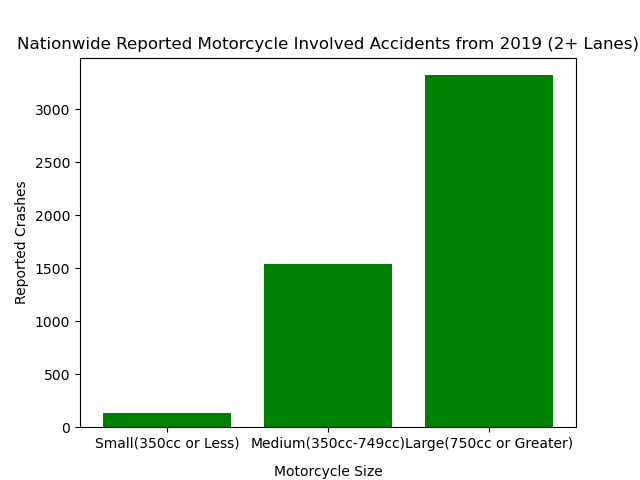

In [12]:
# Motorcycle type affects safety of lane splitting (Calvin)

# Creating a bar graph that shows overall nationwide crashes for different engine sizes for 2019
small_total_2019 = small2019['Engine Size Category'].count()
medium_total_2019 = medium2019['Engine Size Category'].count()
large_total_2019 = large2019['Engine Size Category'].count()

xnames = ["Small(350cc or Less)", "Medium(350cc-749cc)", "Large(750cc or Greater)"]
info = [small_total_2019, medium_total_2019, large_total_2019]
x_ticks = [value for value in xnames]

fig, ax = plt.subplots()
ax.bar(xnames, info, color = 'g')
ax.set_xticks(x_ticks)
ax.set_title("Nationwide Reported Motorcycle Involved Accidents from 2019 (2+ Lanes)")
ax.set_xlabel("Motorcycle Size", labelpad= 10)
ax.set_ylabel("Reported Crashes")
plt.show()

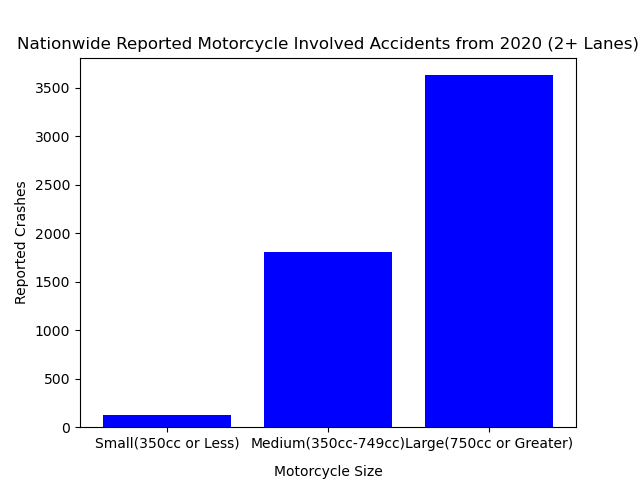

In [13]:
# Motorcycle type affects safety of lane splitting (Calvin)

# Creating a bar graph that shows overall nationwide crashes for different engine sizes for 2020
small_total_2020 = small2020['Engine Size Category'].count()
medium_total_2020 = medium2020['Engine Size Category'].count()
large_total_2020 = large2020['Engine Size Category'].count()

xnames = ["Small(350cc or Less)", "Medium(350cc-749cc)", "Large(750cc or Greater)"]
info = [small_total_2020, medium_total_2020, large_total_2020]
x_ticks = [value for value in xnames]

fig, ax = plt.subplots()
ax.bar(xnames, info, color = 'b')
ax.set_xticks(x_ticks)
ax.set_title("Nationwide Reported Motorcycle Involved Accidents from 2020 (2+ Lanes)")
ax.set_xlabel("Motorcycle Size", labelpad= 10)
ax.set_ylabel("Reported Crashes")
plt.show()

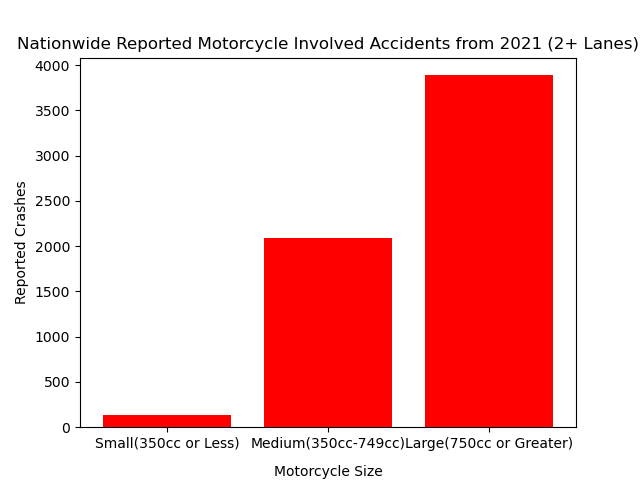

In [14]:
# Motorcycle type affects safety of lane splitting (Calvin)

# Creating a bar graph that shows overall nationwide crashes for different engine sizes for 2021
small_total_2021 = small2021['Engine Size Category'].count()
medium_total_2021 = medium2021['Engine Size Category'].count()
large_total_2021 = large2021['Engine Size Category'].count()

xnames = ["Small(350cc or Less)", "Medium(350cc-749cc)", "Large(750cc or Greater)"]
info = [small_total_2021, medium_total_2021, large_total_2021]
x_ticks = [value for value in xnames]

fig, ax = plt.subplots()
ax.bar(xnames, info, color = 'r')
ax.set_xticks(x_ticks)
ax.set_title("Nationwide Reported Motorcycle Involved Accidents from 2021 (2+ Lanes)")
ax.set_xlabel("Motorcycle Size", labelpad= 10)
ax.set_ylabel("Reported Crashes")
plt.show()

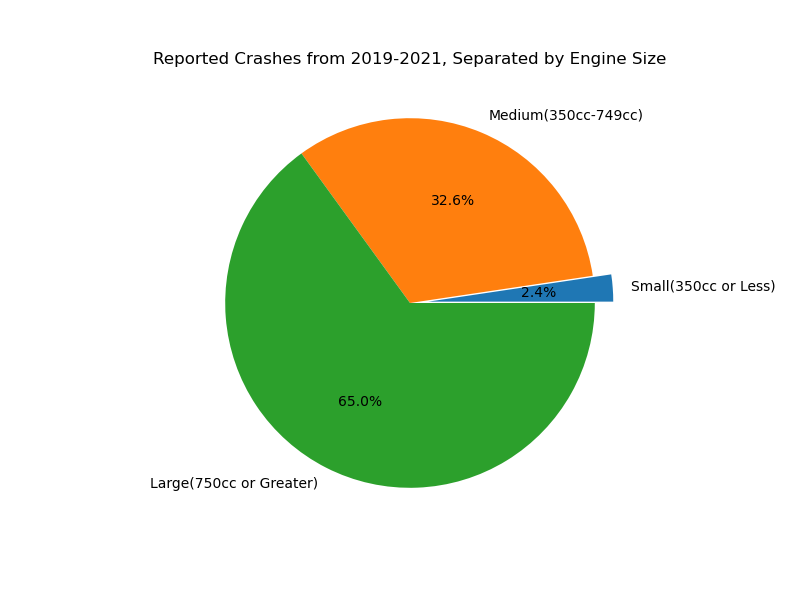

In [20]:
# Motorcycle type affects safety of lane splitting (Calvin)

# Combine all years for a pie chart
small_dfs = [small2019, small2020, small2021]
medium_dfs = [medium2019, medium2020, medium2021]
large_dfs = [large2019, large2020, large2021]

combined_small_df = pd.concat(small_dfs)
combined_medium_df = pd.concat(medium_dfs)
combined_large_df = pd.concat(large_dfs)

# Getting the totals
#concatenated_df = pd.concat([combined_small_df, combined_medium_df, combined_large_df])
#accident_counts = concatenated_df['Deaths'].count()
# Getting the totals
small_overall = combined_small_df['Deaths'].count()
medium_overall = combined_medium_df['Deaths'].count()
large_overall = combined_large_df['Deaths'].count()

pie_values = [small_overall, medium_overall, large_overall]
explode = (0.1, 0, 0)
# Make the pie chart
plt.figure(figsize=(8, 6))
plt.pie(pie_values, labels=xnames, autopct='%1.1f%%', explode=explode)
plt.title('Reported Crashes from 2019-2021, Separated by Engine Size')
plt.show()

In [27]:
combined_large_df.head(2)

,State Name,Month Name,Body Type,Deaths,Vehicle Type ID,Owner,Make and Model,Accident Type,Vehicle Crash Description,Lanes Involved,Engine Size Category
27,Alabama,January,Two Wheel Motorcycle (excluding motor scooters),1,80,1,Yamaha 750cc or greater,Rollover/Overturn,The First Harmful Event was Not a Collision wi...,2,Large
172,Alabama,March,Two Wheel Motorcycle (excluding motor scooters),1,80,1,Harley-Davidson 750cc or greater,Live Animal,The First Harmful Event was Not a Collision wi...,2,Large


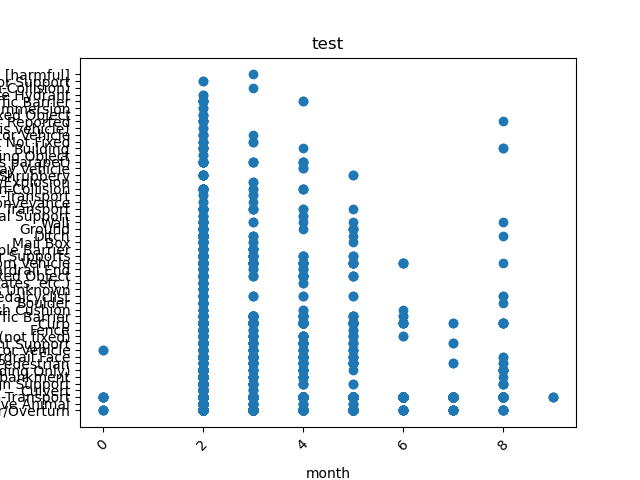

In [39]:
#test
fig, ax = plt.subplots()
ax.scatter(combined_large_df['Lanes Involved'], combined_large_df['Accident Type'])
plt.xticks(rotation=45)
ax.set_title("test")
ax.set_xlabel("month", labelpad= 10)
ax.set_ylabel("lanes")
plt.show()

# Small Discussion on Engine Sizes
Our data isn't really the greatest here. Turns out, the "ID" we've been using to identify motorcycles isn't just 80, but it ranges from 80 to 94 (excluding 88, 89, 91 92, and 93). When I realized this, and tried working with it, I found out that whoever was reporting the crashes wasn't always 100% accurate, and they just defaulted to 80 for a majority of the incidents (which is technically supposed to be sport bikes...). I bring this up because they were also a little lazy with engine sizes, as there's technically codes in the huge csv file for this as well, however most of the time it gets defaulted to a few, which is frustrating as I had to delete huge blocks of code and start from scratch. So, I went with what was printed in the make and model column (MAK_MODNAME) and while this works, it seems to have bias on 750cc or greater, and so the data may not be so reliable.
Despite all that, from my own experience I can say that the results sort of make sense. Scooters for example aren't usually ridden by individuals comfortable with lane filtering or slow speed control, and a good majority of motorcycles I can recognize on the road seem to be on the larger side. I'm going to leave this data as-is because I don't really see a better solution for my question, and I don't think this is going to dock us any serious points, if any.

In [16]:
# Motorcycle laws affects fewer crashes (Rail)


In [17]:
# Motorcycle laws affects deadly crashes (Jack)

# Filter the dataframes for each year for appropriate columns

df_list = [vehicle2019_df, vehicle2020_df, vehicle2021_df]

filtered_df_list=[]

for df in df_list:

    cleaned_df = df[['STATE','BODY_TYP','MONTH','DEATHS','OWNER']]
    motorcycle_df = cleaned_df.loc[cleaned_df['BODY_TYP'].between(80, 87)]
    summer_df = motorcycle_df.loc[(motorcycle_df['MONTH'] >= 4) & (motorcycle_df['MONTH'] <= 8)]
    final_filter_df = summer_df.loc[(summer_df['OWNER'] != 0) & (summer_df['DEATHS'] > 0)]

    filtered_df_list.append(final_filter_df)



In [18]:
# Motorcycle laws affects deadly crashes (Jack) 

# add filtered data frames to law groups for all years:

legal_group = []
somewhat_legal_group = []
not_mentioned_group = []
illegal_group = []


for df in filtered_df_list:
    legal_df = df.loc[(df['STATE']== 6)]
 
    somewhat_legal_df = df.loc[df['STATE'].isin([15,49])]
                                  
    not_mentioned_df = df.loc[df['STATE'].isin([30,35,48,40,29,5,28,20,39,54,37,34])]                      

    illegal_df = df.loc[~df['STATE'].isin([6,15,49,30,35,48,40,29,5,28,20,39,54,37,34,43,52])]  

    legal_group.append(legal_df)
    somewhat_legal_group.append(somewhat_legal_df)
    not_mentioned_group.append(not_mentioned_df)
    illegal_group.append(illegal_df)

    



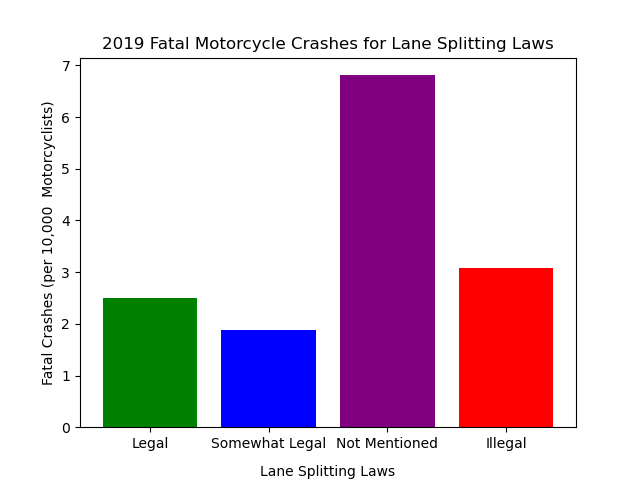

In [19]:
# Motorcycle laws affects deadly crashes 2019 (Jack) 

legal_deaths = legal_group[0]["DEATHS"].count()
somewhat_legal_deaths = somewhat_legal_group[0]["DEATHS"].count()
not_mentioned_deaths = not_mentioned_group[0]["DEATHS"].count()
illegal_deaths = illegal_group[0]["DEATHS"].count()

legal_per_reg_2019 = (legal_deaths / legal_reg_2019) * 10000
somewhat_legal_per_reg_2019 = (somewhat_legal_deaths / somewhat_legal_reg_2019) * 10000
not_mentioned_per_reg_2019 = (not_mentioned_deaths / not_mentioned_reg_2019) * 10000
illegal_per_reg_2019  = (illegal_deaths/ illegal_reg_2019) * 10000

laws = ["Legal", "Somewhat Legal", "Not Mentioned", "Illegal"]
counts = [legal_per_reg_2019,somewhat_legal_per_reg_2019, not_mentioned_per_reg_2019, illegal_per_reg_2019]
x_ticks = [value for value in laws]

fig, ax = plt.subplots()
ax.bar(laws, counts, color = ["green", "blue","purple","red"])
ax.set_xticks(x_ticks)
ax.set_title("2019 Fatal Motorcycle Crashes for Lane Splitting Laws")
ax.set_xlabel("Lane Splitting Laws", labelpad= 10)
ax.set_ylabel("Fatal Crashes (per 10,000  Motorcyclists)")
plt.show()



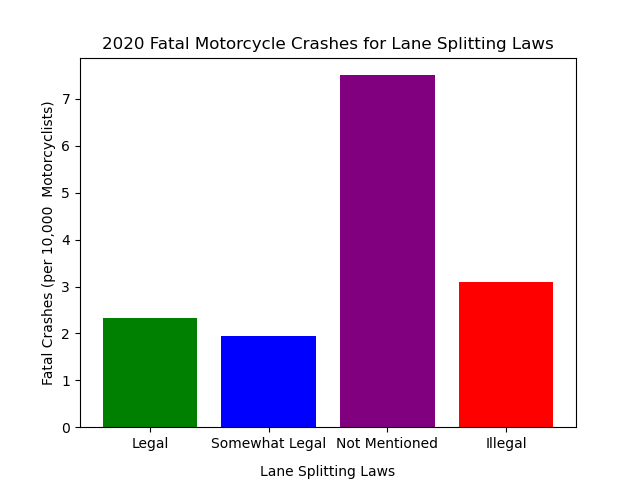

In [20]:
# Motorcycle laws affects deadly crashes 2020 (Jack) 

legal_deaths = legal_group[1]["DEATHS"].count()
somewhat_legal_deaths = somewhat_legal_group[1]["DEATHS"].count()
not_mentioned_deaths = not_mentioned_group[1]["DEATHS"].count()
illegal_deaths = illegal_group[1]["DEATHS"].count()

legal_per_reg_2020 = (legal_deaths / legal_reg_2020) * 10000
somewhat_legal_per_reg_2020 = (somewhat_legal_deaths / somewhat_legal_reg_2020) * 10000
not_mentioned_per_reg_2020 = (not_mentioned_deaths / not_mentioned_reg_2020) * 10000
illegal_per_reg_2020  = (illegal_deaths/ illegal_reg_2020) * 10000

laws = ["Legal", "Somewhat Legal", "Not Mentioned", "Illegal"]
counts = [legal_per_reg_2020,somewhat_legal_per_reg_2020, not_mentioned_per_reg_2020, illegal_per_reg_2020]
x_ticks = [value for value in laws]

fig, ax = plt.subplots()
ax.bar(laws, counts, color = ["green", "blue","purple","red"])
ax.set_xticks(x_ticks)
ax.set_title("2020 Fatal Motorcycle Crashes for Lane Splitting Laws")
ax.set_xlabel("Lane Splitting Laws", labelpad= 10)
ax.set_ylabel("Fatal Crashes (per 10,000  Motorcyclists)")
plt.show()


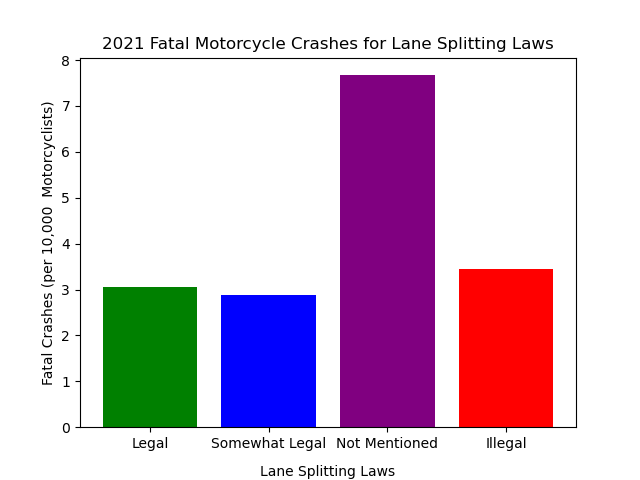

In [35]:
# Motorcycle laws affects deadly crashes 2021 (Jack) 

legal_deaths = legal_group[2]["DEATHS"].count()
somewhat_legal_deaths = somewhat_legal_group[2]["DEATHS"].count()
not_mentioned_deaths = not_mentioned_group[2]["DEATHS"].count()
illegal_deaths = illegal_group[2]["DEATHS"].count()

legal_per_reg_2021 = (legal_deaths / legal_reg_2021) * 10000
somewhat_legal_per_reg_2021 = (somewhat_legal_deaths / somewhat_legal_reg_2021) * 10000
not_mentioned_per_reg_2021 = (not_mentioned_deaths / not_mentioned_reg_2021) * 10000
illegal_per_reg_2021  = (illegal_deaths/ illegal_reg_2021) * 10000

laws = ["Legal", "Somewhat Legal", "Not Mentioned", "Illegal"]
counts = [legal_per_reg_2021,somewhat_legal_per_reg_2021, not_mentioned_per_reg_2021, illegal_per_reg_2021]
x_ticks = [value for value in laws]

fig, ax = plt.subplots()
ax.bar(laws, counts, color = ["green", "blue","purple","red"])
ax.set_xticks(x_ticks)
ax.set_title("2021 Fatal Motorcycle Crashes for Lane Splitting Laws")
ax.set_xlabel("Lane Splitting Laws", labelpad= 10)
ax.set_ylabel("Fatal Crashes (per 10,000  Motorcyclists)")
plt.show()

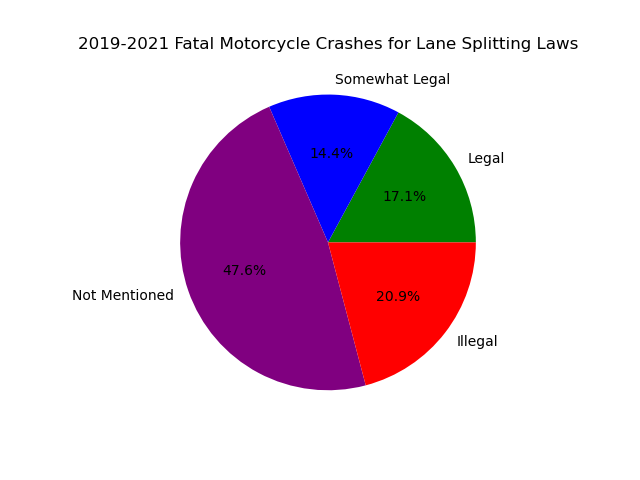

In [60]:
#All Years Pie Chart (Jack)

total_legal_deaths = (sum(len(df) for df in legal_group)/ legal_reg_total) 
total_somewhat_legal_deaths = (sum(len(df) for df in somewhat_legal_group) / somewhat_legal_reg_total) 
total_not_mentioned_deaths = (sum(len(df) for df in not_mentioned_group) / not_mentioned_reg_total) 
total_illegal_deaths = (sum(len(df) for df in illegal_group) / illegal_reg_total) 

group_totals = [total_legal_deaths, total_somewhat_legal_deaths, total_not_mentioned_deaths, total_illegal_deaths]
colors = ["green", "blue","purple","red"]

fig, ax = plt.subplots()
ax.pie(group_totals, labels=laws, colors = colors, autopct='%1.1f%%')
ax.set_title("2019-2021 Fatal Motorcycle Crashes for Lane Splitting Laws")
plt.show()






In [61]:
# statistical testing (Jack)


group1 = [legal_per_reg_2019, legal_per_reg_2020,legal_per_reg_2021]
group2= [somewhat_legal_per_reg_2019, somewhat_legal_per_reg_2020,somewhat_legal_per_reg_2021]
group3 = [not_mentioned_per_reg_2019, not_mentioned_per_reg_2020,not_mentioned_per_reg_2021]
group4 = [illegal_per_reg_2019, illegal_per_reg_2020,illegal_per_reg_2021]

group_anova = st.f_oneway(group1,group2,group3,group4)
legal_vs_illegal = st.ttest_ind(group1,group4,equal_var=False)

print(f"The p value for the anova test between all law groups is: {group_anova[1]}")
print(f"The p value for the t test between legal and illegal groups is: {legal_vs_illegal[1]} ")


The p value for the anova test between all law groups is: 1.4869680934601836e-06
The p value for the t test between legal and illegal groups is: 0.09575809009850729 


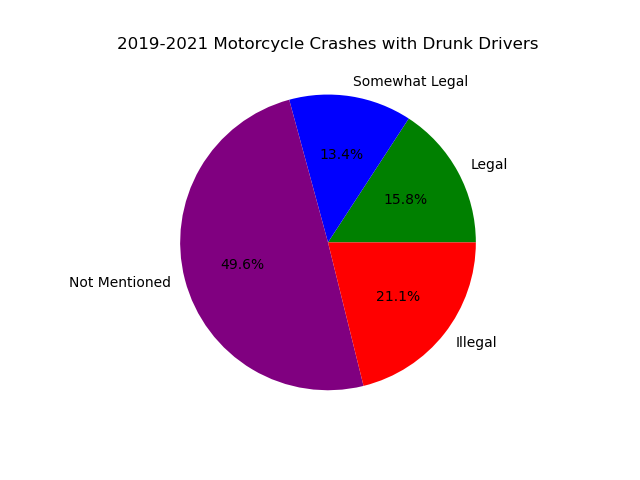

In [62]:
# Pie chart for drunk driving

df_list = [vehicle2019_df, vehicle2020_df, vehicle2021_df]

filtered_df_list=[]

for df in df_list:

    cleaned_df = df[['STATE','BODY_TYP','MONTH','DR_DRINK','OWNER',]]
    motorcycle_df = cleaned_df.loc[cleaned_df['BODY_TYP'].between(80, 87)]
    summer_df = motorcycle_df.loc[(motorcycle_df['MONTH'] >= 4) & (motorcycle_df['MONTH'] <= 8)]
    final_filter_df = summer_df.loc[(summer_df['OWNER'] != 0) & (summer_df['DR_DRINK'] == 1)]

    filtered_df_list.append(final_filter_df)


legal_group = []
somewhat_legal_group = []
not_mentioned_group = []
illegal_group = []


for df in filtered_df_list:
    legal_df = df.loc[(df['STATE']== 6)]
 
    somewhat_legal_df = df.loc[df['STATE'].isin([15,49])]
                                  
    not_mentioned_df = df.loc[df['STATE'].isin([30,35,48,40,29,5,28,20,39,54,37,34])]                      

    illegal_df = df.loc[~df['STATE'].isin([6,15,49,30,35,48,40,29,5,28,20,39,54,37,34,43,52])]  

    legal_group.append(legal_df)
    somewhat_legal_group.append(somewhat_legal_df)
    not_mentioned_group.append(not_mentioned_df)
    illegal_group.append(illegal_df)



total_legal_drunk = (sum(len(df) for df in legal_group)/ legal_reg_total) 
total_somewhat_legal_drunk = (sum(len(df) for df in somewhat_legal_group) / somewhat_legal_reg_total)
total_not_mentioned_drunk = (sum(len(df) for df in not_mentioned_group) / not_mentioned_reg_total) 
total_illegal_drunk = (sum(len(df) for df in illegal_group) / illegal_reg_total)


drunk_groups = [total_legal_drunk, total_somewhat_legal_drunk, total_not_mentioned_drunk, total_illegal_drunk]
colors = ["green", "blue","purple","red"]

fig, ax = plt.subplots()
ax.pie(drunk_groups, labels=laws, colors = colors, autopct='%1.1f%%')
ax.set_title("2019-2021 Motorcycle Crashes with Drunk Drivers")
plt.show()





    

In [63]:
# Motorcycle  laws affects injuries (Rachael)

In [64]:
#compare UT years accidents with chart 

In [65]:
#compare ID years accidents with chart 

In [66]:
#compare UT & ID to CA with chart

In [67]:
#compare COLL types 